## 0) Importando Bibliotecas

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Lendo o arquivo

#### Fonte Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [36]:
netflix = pd.read_csv('netflix_titles.csv')

In [37]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2) Quantidade de filmes na Netflix lançados por ano

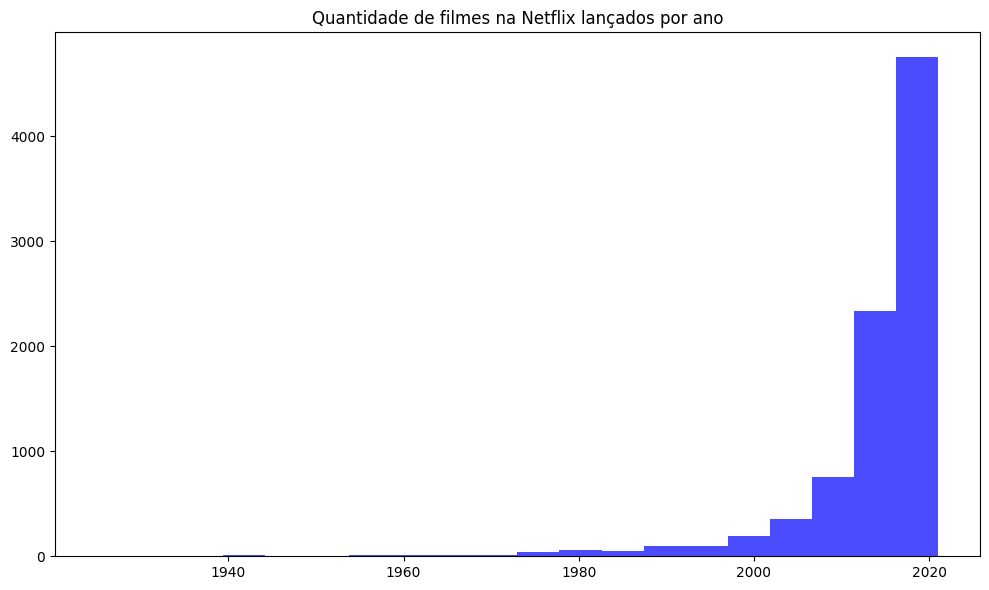

In [42]:
plt.figure(figsize=(10, 6))

plt.hist(netflix['release_year'], bins=20, color='blue', alpha=0.7)
plt.title('Quantidade de filmes na Netflix lançados por ano')

plt.tight_layout()
plt.show()

## 3) Quantidade de lançamentos por gênero na Netflix

<Axes: xlabel='Gêneros'>

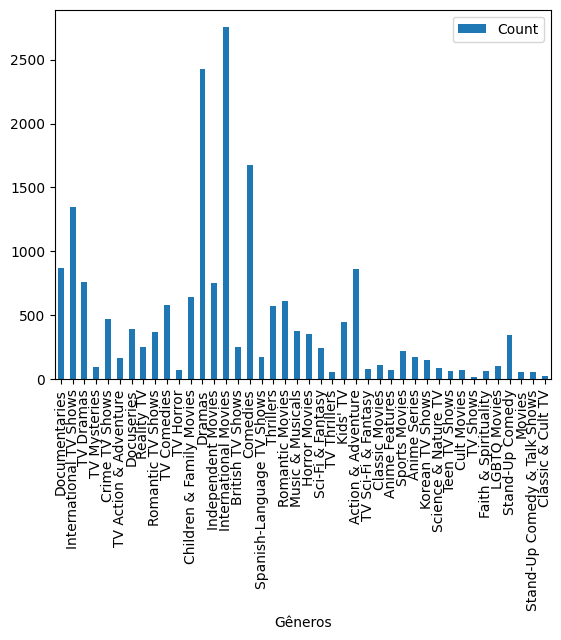

In [77]:
generos = []
for row,items in netflix.iterrows():
    for item in items['listed_in'].split(","):
        if item.strip() not in generos:
            generos.append(item.strip())

nums = [0]*len(generos)
for row,items in netflix.iterrows():
    for item in items['listed_in'].split(","):
        index = generos.index(item.strip())
        nums[index]+=1
        
netflix_generos = pd.DataFrame({"Gêneros":generos,"Count":nums})

netflix_generos.plot(kind="bar",x="Gêneros",y="Count")

## 4) Top 10 Filmes/Séries lançados por país na Netflix

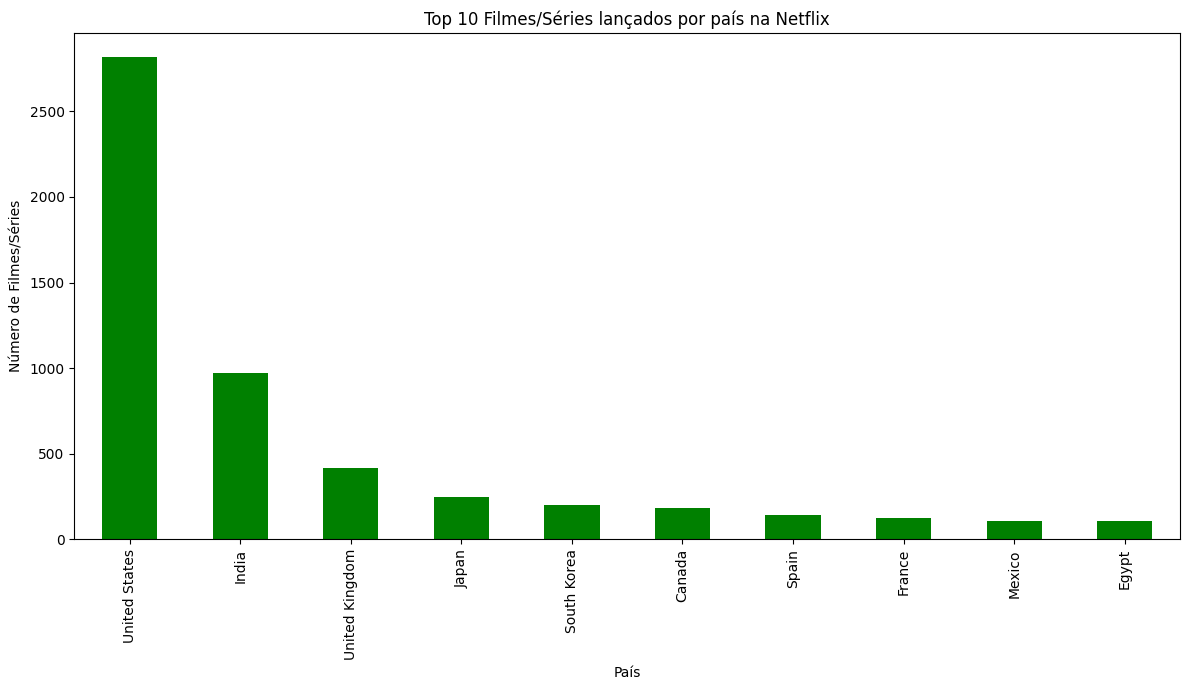

In [63]:
num_pais = netflix['country'].value_counts()

plt.figure(figsize=(12, 7))
num_pais[:10].plot(kind='bar', color='green')
plt.title('Top 10 Filmes/Séries lançados por país na Netflix')
plt.xlabel('País')
plt.ylabel('Número de Filmes/Séries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 5) Número de Filmes/Séries lançados através dos anos

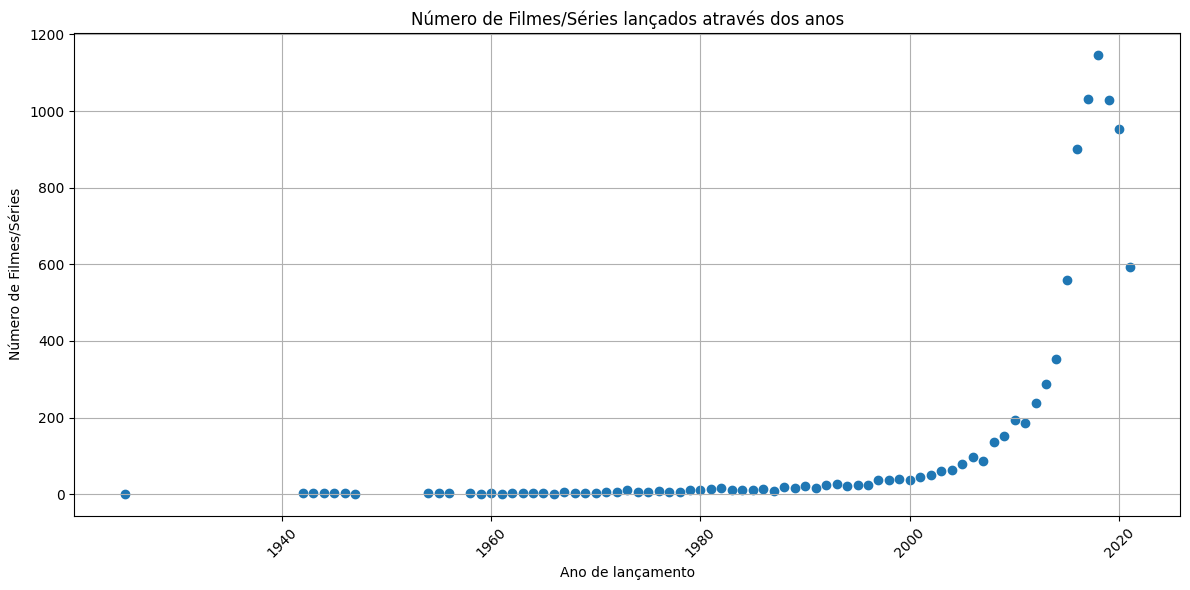

In [72]:
# number of shows/movies released each year
ano_lancamento = netflix['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.scatter(ano_lancamento.index, ano_lancamento.values, marker='o')
plt.title('Número de Filmes/Séries lançados através dos anos')
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de Filmes/Séries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()